# Crime statistics for the City of Atlanta between 2009 and 2017

### import the necessary libraries

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import keras as ks

/home/windell/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### get everything into a dataframe

In [2]:
df2009 = pd.read_csv('../projects/datasets/COBRA-2009/COBRA-2009.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
df2010 = pd.read_csv('../projects/datasets/COBRA-2010/COBRA-2010.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2011 = pd.read_csv('../projects/datasets/COBRA-2011/COBRA-2011.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2012 = pd.read_csv('../projects/datasets/COBRA-2012/COBRA-2012.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2013 = pd.read_csv('../projects/datasets/COBRA-2013/COBRA-2013.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2014 = pd.read_csv('../projects/datasets/COBRA-2014/COBRA-2014.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2015 = pd.read_csv('../projects/datasets/COBRA-2015/COBRA-2015.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
df2016 = pd.read_csv('../projects/datasets/COBRA-2016/COBRA-2016.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
df2017 = pd.read_csv('../projects/datasets/COBRA-2017/COBRA-2017.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
dataframes = [df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017]
df = pd.concat(dataframes)
df.head()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift,Shift Occurence,Location Type,UCR Literal,UCR #,Neighborhood,NPU,Latitude,Longitude
0,90010721,2009-01-01,2009-01-01,815,2009-01-01,0820,408,NaN,NaN,3030 HEADLAND DR SW,D,Day Watch,12,LARCENY-NON VEHICLE,630,Greenbriar,R,33.6884,-84.4874
1,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148,408,NaN,NaN,2841 GREENBRIAR PKWY,D,Day Watch,8,LARCENY-NON VEHICLE,630,Greenbriar,R,33.6885,-84.4933
2,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330,506,NaN,NaN,12 BROAD ST SW,D,Day Watch,9,LARCENY-NON VEHICLE,630,Downtown,M,33.7532,-84.392
3,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520,413,NaN,NaN,3500 MARTIN L KING JR DR SW,NaN,Unknown,8,LARCENY-NON VEHICLE,630,Adamsville,H,33.7574,-84.5028
4,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510,204,NaN,NaN,3393 PEACHTREE RD NE,E,Evening Watch,8,LARCENY-NON VEHICLE,630,Lenox,B,33.8468,-84.3621


### too many null values for 'Apartment Office Prefix' and 'Apartment Number' plus we have the location info

In [3]:
df = df.dropna(axis=0, how='all')
df = df.fillna(0)
df = df.drop(['Apartment Office Prefix','Apartment Number'],axis=1)

### this line has no useful information

In [4]:
df = df.drop(df[df['Report Number']=='Report Number'].index)

### "Shift" and "Shift Occurence" have the same information

In [5]:
df = df.drop(['Shift'],axis=1)

### attempt to change all features back to thier original datatypes

In [6]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors = 'coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors = 'coerce')
df['Report Number'] = pd.to_numeric(df['Report Number'], downcast='integer')
df['Occur Time'] = pd.to_numeric(df['Occur Time'], downcast='integer')
df['Possible Time'] = pd.to_numeric(df['Possible Time'], downcast='integer')
df['Beat'] = pd.to_numeric(df['Beat'], downcast='integer')
#df['Location Type'] = pd.to_numeric(df['Location Type'], downcast='integer')
df['UCR #'] = pd.to_numeric(df['UCR #'], downcast='integer')
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['Occur Date'] = pd.to_datetime(df['Occur Date'])
df['Possible Date'] = pd.to_datetime(df['Possible Date'])

In [7]:
df.head()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,Neighborhood,NPU,Latitude,Longitude
0,90010721,2009-01-01,2009-01-01,815,2009-01-01,820,408,3030 HEADLAND DR SW,Day Watch,12,LARCENY-NON VEHICLE,630,Greenbriar,R,33.68841,-84.48742
1,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148,408,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,Greenbriar,R,33.68845,-84.49328
2,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330,506,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,Downtown,M,33.75320,-84.39201
3,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520,413,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,Adamsville,H,33.75735,-84.50282
4,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510,204,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,Lenox,B,33.84676,-84.36212


## Let us compare top 10 Neighborhoods that have the highest number of incidences

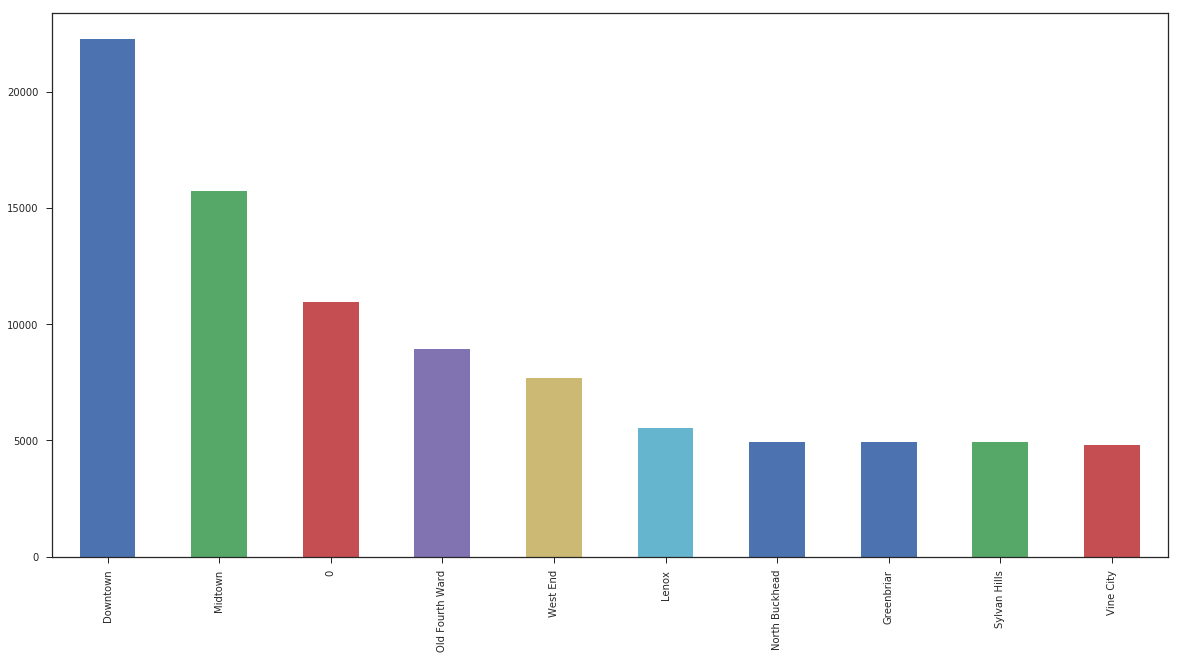

In [8]:
max_neighborhood = df['Neighborhood'].value_counts()
plt.figure(figsize=(20,10))
max_neighborhood[0:10].plot.bar()

## Let us compare the top 10 Uniform Crime Reports

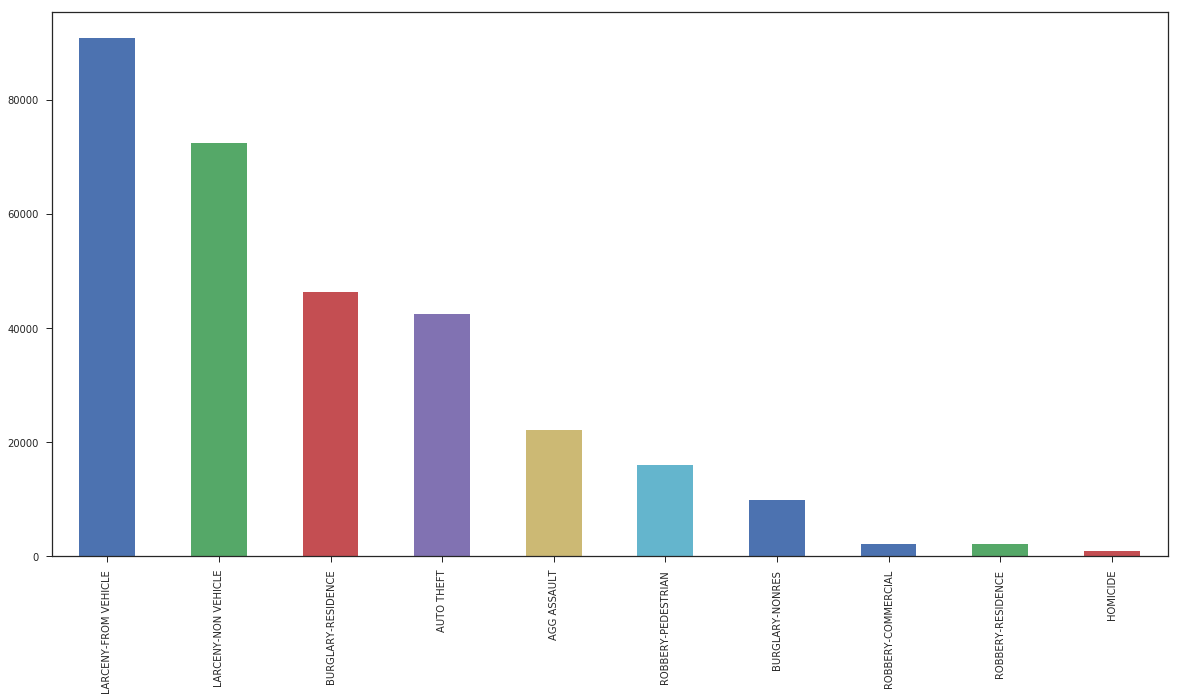

In [9]:
max_crime_types = df['UCR Literal'].value_counts()
plt.figure(figsize=(20,10))
max_crime_types[0:10].plot.bar()

## From the graph we can see there are twice as many incidence that occur Downtown as compared to the Old Fourth Ward Neighborhood.  But each of the top 10 Neighborhoods have over 5000 incidences.
## From the graph we can see you are twice as likely to have something taken from your vehicle (LARCENY-FROM VEHICLE) as compared with your vehicle being stolen (AUTO THEFT).
## From the graph we can see you are twice as likely to have something stolen from your residence (BURGLARY-RESIDENCE) as compared with being robbed (ROBBERY-PEDESTRIAN).